In [1]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
#Inizializing the list of numbers of thallium atoms
n_tl = [1000]

#Computing tau starting from the half-life of thallium atoms
tau = (3.052 * 60) / np.log(2)

#Probability function
def p(t):
    return 1 - (2**(-(t / tau)))

t = 0   #Starting time
dt = 1  #Time step

To compute the number of decays at each time step we associate a random number probability with np.random.uniform(0, 1): if this probability is less than the probability evaluated at the time step then that atom will decay. Basically, sooner or later each atom will 'draw' a number that is less than p(dt), and so every atom will eventually decay.

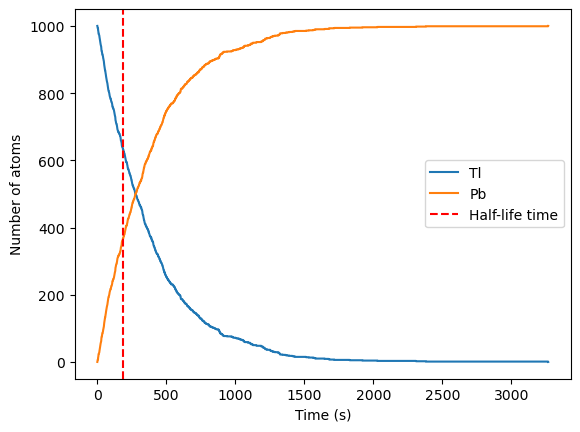

In [3]:
while n_tl[-1] != 0:                                                  #When the number of thallium atoms becomes zero we break the cycle
    t += dt                                                           #Updating time
    n_decay = int(np.sum(np.random.uniform(0, 1, n_tl[-1]) < p(dt)))  #Computing the number of decays at each step
    n_tl.append(n_tl[-1] - n_decay)                                   #Updating the numbers of thallium atoms list

#Creating the number of lead atoms array by subtracting each element of n_tl to the initial number of atoms
n_tl = np.array(n_tl)
n_pb = n_tl[0] - n_tl

#Creating the time array in order to plot
time = np.arange(0, t+dt, dt)
    
#Plot
plt.plot(time, n_tl, label = 'Tl')
plt.plot(time, n_pb, label = 'Pb')
plt.axvline(3.052 * 60, color = 'red', linestyle = '--', label = 'Half-life time')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

Notice that having $2$ instead of $e$ in the probability function shifts the half-life time value with respect to the one given in the text: if we substitute $e$ to $2$ we'll get the correct location of the meeting point of the curves.

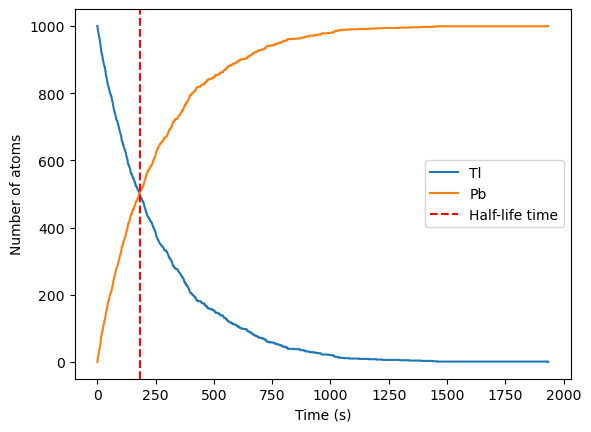

In [4]:
#Re-doing the same process just changing the probability function
n_tl = [1000]
tau = (3.052 * 60) / np.log(2)

def p(t):
    return 1 - (np.e**(-(t / tau)))   #e instead of 2

t = 0   
dt = 1 

while n_tl[-1] != 0:                                                  
    t += dt                                                           
    n_decay = int(np.sum(np.random.uniform(0, 1, n_tl[-1]) < p(dt)))  
    n_tl.append(n_tl[-1] - n_decay)                                   

n_tl = np.array(n_tl)
n_pb = n_tl[0] - n_tl

time = np.arange(0, t+dt, dt)
    
plt.plot(time, n_tl, label = 'Tl')
plt.plot(time, n_pb, label = 'Pb')
plt.axvline(3.052 * 60, color = 'red', linestyle = '--', label = 'Half-life time')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

For the second part of the exercise, given

$$p(t)=2^{-\frac{t}{\tau}}\frac{\ln2}{\tau}$$

we have

$$\int_0^{t(z)}p(t')dt'=\frac{\ln2}{\tau}\left(-\frac{\tau}{\ln2}\right)2^{-\frac{t'}{\tau}}\bigg|_0^{t(z)}=1-2^{-\frac{t(z)}{\tau}}$$

So we find:

$$z=1-2^{-\frac{t(z)}{\tau}} \ \iff \ 2^{-\frac{t(z)}{\tau}}=1-z \ \Longrightarrow \ t(z)=-\tau\log_2(1-z)$$

$z$ is the probability associated to an atom in order for it to survive for a time $t$: the closer $z$ is to $0$ the less time it will survive; viceversa, the closer $z$ is to $1$ the more time until it decays.

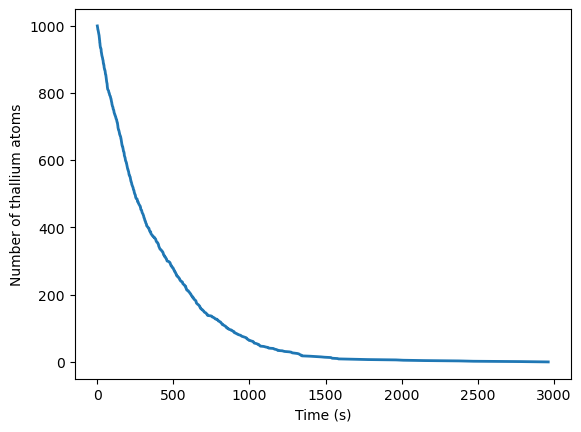

In [5]:
#Inverse cumulative distribution
def icdf(z):
    return (-tau) * np.log2(1 - z)

#Inizialize the list containing the t values
times = []

for atom in range(0, n_tl[0]):
    t = icdf(np.random.uniform(0, 1))   #Random generation of z with np.random.uniform(0,1)
    times.append(t)                     #Saving t value to the list
    
times = np.sort(np.array(times))        #Sorting t values...
times = times[::-1]                     #...in descending order (recall that thallium atoms decrease over time)

#Plot
plt.plot(times, range(0, n_tl[0]), linewidth = 2)
plt.xlabel('Time (s)')
plt.ylabel('Number of thallium atoms')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [6]:
#Declaring all costants
Z = 79
e = -1.60e-19
epsilon0 = 8.85e-12
E = 8.8 * abs(e) * 10**(6)   #Converting it to joules
a0 = 5.29e-11

#Computing the beam as a 2D gaussian distribution
N = int(1e6)
sigma = a0 / 100

x, y = np.random.normal(0, sigma, N), np.random.normal(0, sigma, N)
b = np.sqrt(x**2 + y**2)

For $\theta=\frac{\pi}{2}$ we got

$$\tan\frac{\theta}{2}=\tan\frac{\pi}{4}=1$$

For angles bigger than $\frac{\pi}{2}$ we will have bigger values, so the condition becomes

$$\frac{Ze^2}{2\pi\epsilon_0Eb}>1 \ \Longrightarrow \ b<\frac{Ze^2}{2\pi\epsilon_0E}$$

In [8]:
#Counting how many particles are bounced back
backscattering = np.sum(b < ((Z*e*e) / (2*np.pi*epsilon0*E)))

print(f"The particles that are bounced back are {backscattering} over {N}: {backscattering / N * 100:.2f}%")

The particles that are bounced back are 1150 over 1000000: 0.11%


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [9]:
def f(x):
    return (np.sin(1 / (x * (2 - x)))) ** 2

N = int(1e6)

#Monte Carlo method

n_simulations = [10, 20, 50, 100]

x_min, x_max = 0.001, 1.999   #x=0 and x=1 are not in the domain of f(x)
y_min, y_max = 0, 1           #f(x) is a squared sine function, so it's limited between 0 and 1

for n in n_simulations:

    areas = []

    for _ in range(n):
    
        x = np.random.uniform(x_min, x_max, N)
        y = np.random.uniform(y_min, y_max, N)
        hits = np.sum(y < f(x))
    
        monte_carlo_area = (hits * abs(x_max - x_min) * abs(y_max - y_min)) / N
        areas.append(monte_carlo_area)
    
    area = np.mean(areas)
    error = np.std(areas) / np.sqrt(n)

    print(f"Area with the Monte Carlo method ({n} simulations): {area} ± {error}")

#Mean value method

x = np.random.uniform(x_min, x_max, N)
    
area = (abs(x_max - x_min) / N) * np.sum(f(x))
error = np.std(f(x)) / np.sqrt(N)
    
print(f"Area with the mean value method: {area} ± {error}")

Area with the Monte Carlo method (10 simulations): 1.4498445042 ± 0.0002434148648243923
Area with the Monte Carlo method (20 simulations): 1.4504418063000002 ± 0.00019876531768844342
Area with the Monte Carlo method (50 simulations): 1.4503713368400002 ± 0.00013564160618232906
Area with the Monte Carlo method (100 simulations): 1.45040716098 ± 7.906480336390181e-05
Area with the mean value method: 1.4507072515481487 ± 0.0002632370314841866


With just 10 simulations of the Monte Carlo method we get a very similar error compared to the mean value's one, so for a larger number of iterations the Monte Carlo method should be preferred in general.

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [10]:
#Area of a circle
def f(x, y, r):
    z = (x*x) + (y*y)
    return 1 if z <= r**2 else 0

N = int(1e6)
r = 1

x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

hits = np.sum(np.array([f(x_i, y_i, r) for x_i, y_i in zip(x, y)]))
area = (hits * (2*r) ** 2)/ N
print("Area of circle:", area)

#Generalizing for a 10D sphere

def f(v, r):
    squared_sum = np.sum(v**2)
    return 1 if squared_sum <= r**2 else 0

dim = 10
        
vectors = np.random.uniform(-1, 1, size = (dim, N))   #dim rows and N columns; each row are N random numbers, each column is a vector of dimension dim
hits = 0

for i in range(N):
    v = vectors[:, i]   #Columns of the matrix
    hits += f(v, r)
    
area = (hits * (2*r) ** dim) / N
print("Area of 10D sphere:", area)

Area of circle: 3.14256
Area of 10D sphere: 2.533376


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [11]:
def f(x):
    return 1 / (np.sqrt(x) * (np.exp(x) + 1))

def w(x):
    return 1 / np.sqrt(x)

First we need to get the inverse cumulative function of $w(x)$ in order to extract random points with $w(x)$ as probability density function. First we evaluate $z$:

$$z=\int_0^{x(z)}w\left(x'\right)dx'=\int_0^{x(z)}\frac{1}{\sqrt{x'}}dx'=2\sqrt{x'}\bigg|_0^{x(z)}=2\sqrt{x(z)}$$

Then, we get $x(z)$:

$$x(z)=\frac{z^2}{4}$$

In [12]:
def icdf(z):
    return (z*z) / 4

#Random points drew from w(x)
N = int(1e6)
a = 0
b = 1
x = icdf(np.random.uniform(a, b, N))

The integral $I$ will be

$$I=\frac{1}{N}\sum_{i=1}^N\frac{f\left(x_i\right)}{w\left(x_i\right)}\int_0^1w(x)dx$$

So we still miss the integral of $w(x)$, thus we'll first computing it (I'll use the mean value method).

In [13]:
points = np.random.uniform(a, b, N)
w_integral = ((b - a) / N) * np.sum(w(points))

Now we can finally evaluate $I$.

In [15]:
I = (1 / N) * np.sum(f(x) / w(x)) * w_integral
print("I =", I)

I = 0.9605968870197326


We get $I\simeq0.96$, which is not the correct result according to the text. I don't think I made mistakes, instead I suppose the professor didn't consider the factor $\frac{1}{4}$ in the inverse cumulative function. Doing the same calculations without that factor, in fact, leads us to the correct result:

In [16]:
def icdf_without_quarter_factor(z):
    return z*z

x = icdf_without_quarter_factor(np.random.uniform(a, b, N))
I = (1 / N) * np.sum(f(x) / w(x)) * w_integral
print("I =", I)

I = 0.8409925718914119
